In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the file
file_path="PublicTablesForCarbonCatalogueDataDescriptor_v30Oct2021.xlsx"
data=pd.ExcelFile(file_path)
print (data)

In [3]:
data_frame=pd.read_excel(data)
print(data_frame)

          *PCF-ID  Year of reporting *Stage-level CO2e available  \
0    10056-1-2014               2014                         Yes   
1    10056-1-2015               2015                         Yes   
2    10222-1-2013               2013                         Yes   
3    10261-1-2017               2017                         Yes   
4    10261-2-2017               2017                         Yes   
..            ...                ...                         ...   
861   9298-2-2014               2014                         Yes   
862   9298-3-2013               2013                         Yes   
863   9298-3-2014               2014                         Yes   
864   9792-1-2017               2017                          No   
865   9792-2-2017               2017                          No   

                    Product name (and functional unit)  \
0                             Frosted Flakes(R) Cereal   
1    Frosted Flakes, 23 oz, produced in Lancaster, ...   
2        

In [4]:
nice_data=pd.DataFrame(data_frame)
nice_data

,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
2,10222-1-2013,2013,Yes,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,...,(not reported by company),N/a,N/a (no previous data available),Yes,0.8063,0.1736,0.0201,(included in up/downstream but not reported se...,0,"Changed %change to zero, according to field ""c..."
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,NaN
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,9298-2-2014,2014,Yes,Desktop CPU,Microprocessors made for desktop PCs,Intel Corporation,USA,Semiconductors & Semiconductor Equipment,Semiconductors & Semiconductor Equipment,"Computer, IT & telecom",...,(not reported by company),N/a,N/a (no %change reported),No,0.3214,0.5429,0.1357,(included in up/downstream but not reported se...,(included in downstream but not reported separ...,NaN
862,9298-3-2013,2013,Yes,Mobile CPU,Field not included in 2013 data,Intel Corporation,USA,Technology Hardware & Equipment,Computers & Peripherals,"Computer, IT & telecom",...,0.17,Newer line of products are somewhat larger and...,Product carbon efficiency changed,No,0.2857,0.7143,0,0,(included in downstream but not reported separ...,NaN
863,9298-3-2014,2014,Yes,Mobile CPU,Microprocessors made for laptop and mobile com...,Intel Corporation,USA,Semiconductors & Semiconductor Equipment,Semiconductors & Semiconductor Equipment,"Computer, IT & telecom",...,(not reported by company),N/a,N/a (no %change reported),No,0.3143,0.5429,0.1429,(included in up/downstream but not reported se...,(included in downstream but not reported separ...,NaN
864,9792-1-2017,2017,No,Complete catalyst system for diesel-powered pa...,3 different coated substrates (uncanned) for u...,Johnson Matthey,United Kingdom,Materials,Chemicals,Chemicals,...,(not reported by company),N/a,N/a (no %change reported),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insuf

In [5]:
#now get the averages between sectors
sector_average=data_frame.groupby('*Company\'s sector')['*Carbon intensity'].mean()
print (sector_average)

*Company's sector
Automobiles & components                 21.599867
Chemicals                                 5.173017
Comm. equipm. & capital goods           106.041607
Computer, IT & telecom                   75.294625
Construction & commercial materials       1.178955
Food & Beverage                           5.087266
Home durables, textiles, & equipment     13.283033
Packaging for consumer goods              1.276053
Name: *Carbon intensity, dtype: float64


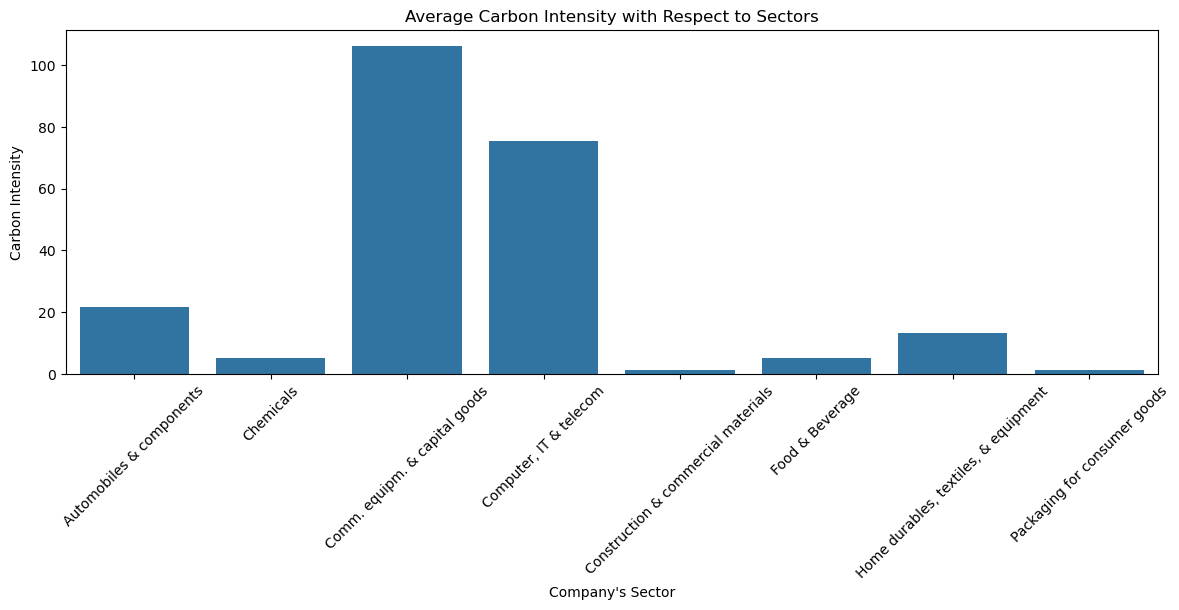

In [6]:
sector_average_df = sector_average.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_average_df, x='*Company\'s sector', y='*Carbon intensity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Carbon Intensity')
plt.xlabel('Company\'s Sector')
plt.title('Average Carbon Intensity with Respect to Sectors')
plt.show()

In [7]:
#Which countries differ significantly in their average CI?
#now get the averages between countries
country_average_CI=data_frame.groupby('Country (where company is incorporated)')['*Carbon intensity'].mean()
print (country_average_CI)

Country (where company is incorporated)
Australia          10.500000
Belgium             1.175000
Brazil            106.168235
Canada            370.148333
Chile               0.516667
China              44.586667
Colombia            0.175000
Finland             9.669714
France             60.863500
Germany            20.763582
Greece              0.700000
India               1.536250
Indonesia           0.720000
Ireland             0.855000
Italy               1.563478
Japan              44.831364
Lithuania           0.360000
Luxembourg          1.370000
Malaysia           58.417500
Netherlands         2.706571
South Africa        1.106364
South Korea        22.316818
Spain               2.445385
Sweden              8.676923
Switzerland         6.869286
Taiwan             29.098000
USA                45.086623
United Kingdom     17.763125
Name: *Carbon intensity, dtype: float64


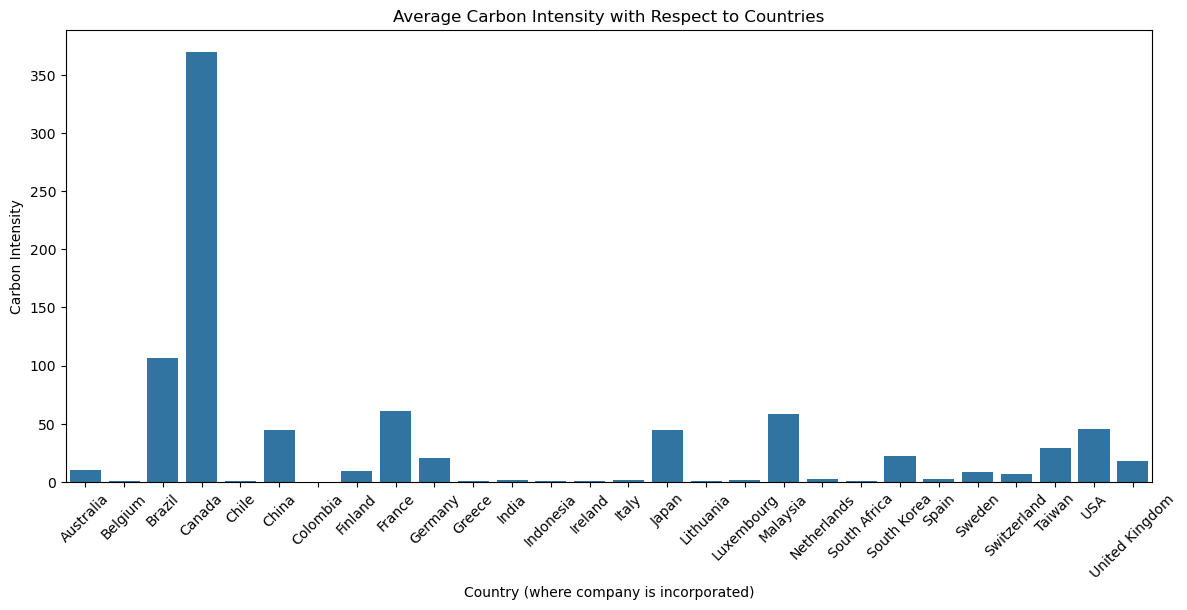

In [8]:
country_average_df = country_average_CI.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=country_average_df, x='Country (where company is incorporated)', y='*Carbon intensity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Carbon Intensity')
plt.xlabel('Country (where company is incorporated)')
plt.title('Average Carbon Intensity with Respect to Countries')
plt.show()

In [9]:
#calculating the variance across sectors
variance_by_sector=data_frame.groupby('*Company\'s sector')['*Carbon intensity'].var()
print (variance_by_sector)

*Company's sector
Automobiles & components                  111.583872
Chemicals                                 155.532613
Comm. equipm. & capital goods           40017.344996
Computer, IT & telecom                  10898.021103
Construction & commercial materials         1.290703
Food & Beverage                           125.880768
Home durables, textiles, & equipment      732.011116
Packaging for consumer goods                0.453014
Name: *Carbon intensity, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Automobiles & components'),
  Text(1, 0, 'Chemicals'),
  Text(2, 0, 'Comm. equipm. & capital goods'),
  Text(3, 0, 'Computer, IT & telecom'),
  Text(4, 0, 'Construction & commercial materials'),
  Text(5, 0, 'Food & Beverage'),
  Text(6, 0, 'Home durables, textiles, & equipment'),
  Text(7, 0, 'Packaging for consumer goods')])

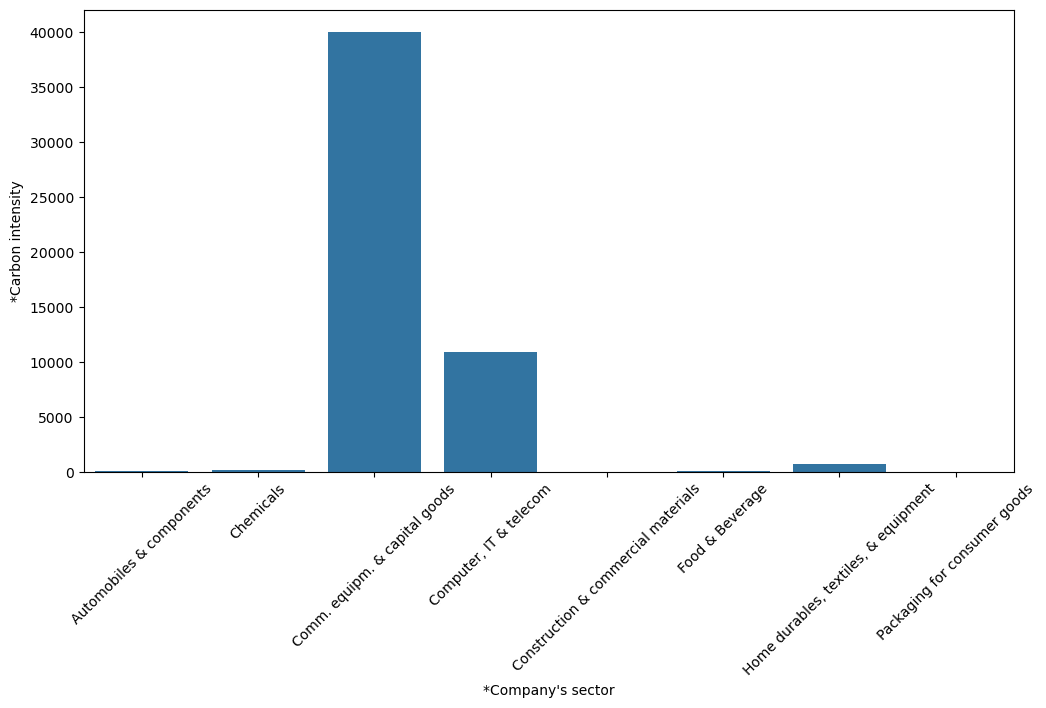

In [10]:
#visualise the variance
variance= variance_by_sector.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=variance, x='*Company\'s sector',y='*Carbon intensity')
plt.xticks(rotation=45)

In [11]:
#get the variance for the countries
variance_by_country=data_frame.groupby('Country (where company is incorporated)')['*Carbon intensity'].var()
print (variance_by_country)

Country (where company is incorporated)
Australia           198.753560
Belgium               0.015429
Brazil            72033.410778
Canada             2193.847657
Chile                 0.003333
China              2462.570187
Colombia              0.000050
Finland             716.462068
France             7669.542277
Germany              58.250648
Greece                     NaN
India                 0.803758
Indonesia                  NaN
Ireland               0.013230
Italy                 0.735878
Japan              5813.141783
Lithuania                  NaN
Luxembourg            0.064800
Malaysia            198.090892
Netherlands           2.529206
South Africa          0.084665
South Korea         751.292385
Spain                 5.499827
Sweden              414.432374
Switzerland         101.064362
Taiwan             2609.065826
USA                9687.224246
United Kingdom     1004.746816
Name: *Carbon intensity, dtype: float64


In [ ]:
#